In [1]:
import numpy as np
import pandas as pd
import re
import itertools

import imageio
import imagesc

import glob
import re

import matplotlib.pyplot as plt
import seaborn as sns

import skimage
from skimage import measure
from skimage.transform import resize
import skimage.io
from skimage.io import imsave
from skimage.measure import label, regionprops_table, regionprops

import cv2 as cv
from typing import List
import tifffile as tiff

In [2]:
data_path = '/Users/haokai/Desktop/Github repository/Processed data/'

In [3]:
file_path = '/Users/haokai/Desktop/Github repository/Analysis/Fig. 2 & S2 & S3/'

In [4]:
dosages = pd.read_csv(file_path + 'BMP-BC2_dosage_conditions.csv')
dosages

,cell_line,TMP (uM),Dox (ng/ml ),BMP2 (ng/ml )
0,0,0,0,0
1,1,10,2500,1024
2,2,10,500,1024
3,3,10,100,1024
4,4,10,20,1024
5,5,10,2500,256
6,6,10,500,256
7,7,10,100,256
8,8,10,20,256
9,9,10,2500,64


In [5]:
data_dir = '/Volumes/T7 Shield/Kai/230928_ratiomrtic_barcode_readout/'
raw_names = sorted(glob.glob(data_dir + 'Raw data/**/*).czi', recursive = True))
len(raw_names)

189

In [3]:
bc_state = pd.read_csv(data_dir + 'Monoclone_barcoding_test_230928.CSV')
bc_state

,cell_line,TMP (uM),Dox (ng/ml ),BMP2 (ng/ml )
0,0,0,0,0
1,1,10,2500,1024
2,2,10,500,1024
3,3,10,100,1024
4,4,10,20,1024
5,5,10,2500,256
6,6,10,500,256
7,7,10,100,256
8,8,10,20,256
9,9,10,2500,64


# The Maximum intensity projected(max) and segemented masks(mask) for each channel used for following intensity measurement
    path_647mask = data_dir + 'ch2_mask/' + re.split('/', f)[-1][0:-4] + '_ch2_Probabilities.tif'
    path_546mask = data_dir + 'ch3_mask/' + re.split('/', f)[-1][0:-4] + '_ch3_Probabilities.tif'
    path_DAPImask = data_dir + 'ch4_mask_GPU/' + re.split('/', f)[-1][0:-4] + '_ch4_cp_masks.png'
    
    path_CFPmax = data_dir + 'SmartMax/' + re.split('/', f)[-1][0:-4] + '_ch1.tif'
    path_647max = data_dir + 'SmartMax/' + re.split('/', f)[-1][0:-4] + '_ch2_rolling_50.tif'
    path_546max = data_dir + 'SmartMax/' + re.split('/', f)[-1][0:-4] + '_ch3_rolling_50.tif'
    path_DAPImax = data_dir + 'SmartMax/' + re.split('/', f)[-1][0:-4] + '_ch4.tif'
    

In [7]:
sc_df = pd.read_csv(data_path + 'BMP-BC2_dosage_dependent_recording.csv')
sc_df

,cell_line,position,cell_label,Dox (ng/ml ),BMP2 (ng/ml ),CFP_intensity,lnCFP,int_ratio mean,int_ratio std,int_ratio CV,int_diff mean,int_diff std,int_diff CV,mout avg mean,mout avg std,mout avg CV,barcode_number sum
0,0,1,1,0,0,1020.498223,6.928046,0.625475,0.012181,1.590069,-6.568715,0.156380,-1.943822,0.359087,0.135968,30.916603,3
1,0,1,2,0,0,1062.261955,6.968156,0.623317,0.023855,3.423087,-6.764787,0.562720,-7.440180,0.295155,0.143673,43.538048,5
2,0,1,3,0,0,1093.059587,6.996736,0.616064,NaN,0.000000,-7.043901,NaN,-0.000000,0.271296,NaN,0.000000,1
3,0,1,4,0,0,1042.568262,6.949442,0.627106,0.024329,3.470008,-6.585881,0.316601,-4.299748,0.342741,0.090283,23.560460,5
4,0,1,5,0,0,1145.337976,7.043455,0.627530,0.076757,11.843176,-6.258003,1.048450,-16.221741,0.419530,0.129023,29.777555,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17430,20,9,69,20,4,962.053082,6.869070,0.622532,0.065193,10.061436,-6.550015,1.114520,-16.348002,0.382180,0.131907,33.160422,13
17431,20,9,70,20,4,1839.106764,7.517035,0.635130,0.063542,9.491232,-6.471267,1.228574,-18.010810,0.350386,0.113246,30.661824,10
17432,20,9,71,20,4,994.761629,6.902503,0.628758,0.021929,3.183803,-6.848468,0.485988,-6.478011,0.276732,0.078895,26.025479,6
17433,20,9,72,20,4,1386.660573,7.234654,0.607548,0.009337,1.402952,-6.516328,0.355499,-4.980184,0.464121,0.107343,21.113045,6


In [8]:
cell_counts = sc_df.groupby('cell_line', as_index=False).size()
cell_counts

,cell_line,size
0,0,800
1,1,823
2,2,942
3,3,898
4,4,1071
5,5,714
6,6,743
7,7,930
8,8,750
9,9,881


In [9]:
# Set the font properties
plt.rcParams.update({
    'font.family': 'Arial',     # Set the font family
    'font.size': 12,            # Set the base font size
    'axes.titlesize': 16,       # Set the font size of the axes title
    'axes.labelsize': 16,       # Set the font size of the x and y labels
    'xtick.labelsize': 12,      # Set the font size of the x tick labels
    'ytick.labelsize': 12,      # Set the font size of the y tick labels
    'legend.fontsize': 12,      # Set the font size of the legend
    'figure.titlesize': 16      # Set the font size of the figure title
})

# Fig 2H

In [10]:
import pandas as pd

# Define a function to calculate statistics including median and quartiles
def calculate_statistics(df):
    stats_df = df.groupby(['BMP2 (ng/ml )', 'Dox (ng/ml )']).agg({
        'lnCFP': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
        'int_diff mean': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
        #'mout avg mean': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]
    }).reset_index()
    
    # Flatten the column hierarchy
    stats_df.columns = [
        'BMP2 (ng/ml )', 'Dox (ng/ml )',
        'lnCFP_median', 'lnCFP_25th', 'lnCFP_75th',
        'int_diff_mean_median', 'int_diff_mean_25th', 'int_diff_mean_75th',
        #'mout_avg_mean_median', 'mout_avg_mean_25th', 'mout_avg_mean_75th'
    ]
    
    return stats_df

# Assuming sc_df is already defined and contains the necessary data
# Calculate statistics for the entire DataFrame
stats_df = calculate_statistics(sc_df)

# Display the resulting DataFrame
stats_df

,BMP2 (ng/ml ),Dox (ng/ml ),lnCFP_median,lnCFP_25th,lnCFP_75th,int_diff_mean_median,int_diff_mean_25th,int_diff_mean_75th
0,0,0,7.022365,6.960768,7.107836,-6.192730,-6.466314,-5.893307
1,4,20,7.145393,7.032515,7.294943,-6.046623,-6.377604,-5.682752
2,4,100,7.270039,7.125150,7.457474,-2.429673,-3.977050,-0.963441
3,4,500,7.371755,7.256313,7.529994,-2.109823,-3.397791,-0.715292
4,4,2500,7.329174,7.175637,7.492935,-1.540565,-2.745075,-0.359661
5,16,20,7.661753,7.436833,7.923372,-5.970563,-6.303157,-5.345134
6,16,100,7.855285,7.648970,8.182811,0.157154,-1.771438,2.173914
7,16,500,7.582635,7.379352,7.822546,0.764282,-0.866798,2.590974
8,16,2500,7.763155,7.500339,8.051032,1.833775,-0.129105,3.758529
9,64,20,7.962726,7.711478,8.210856,-5.882569,-6.339075,-4.926304


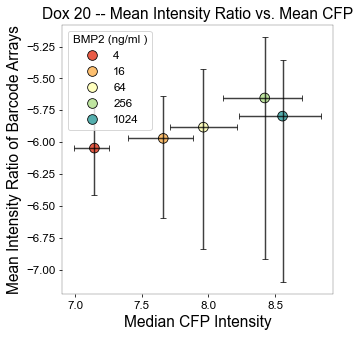

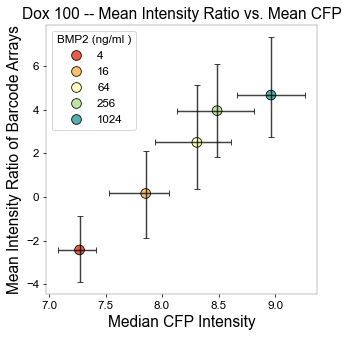

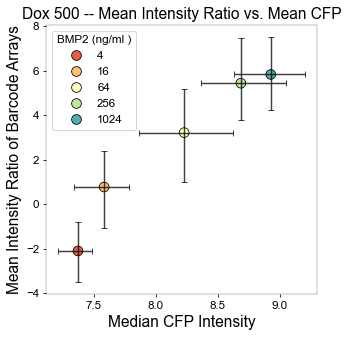

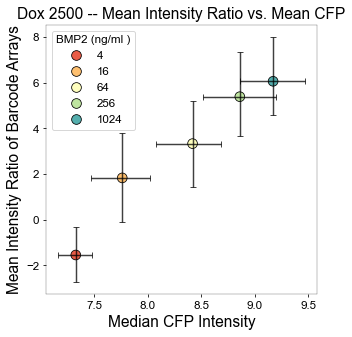

In [13]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure CHIR_levels and color_palette are set
Dox_levels = [20, 100, 500, 2500]
##color_palette = sns.color_palette(['#C0C0C0', '#B266FF', '#99CCFF'])
custom_palette = sns.color_palette("Spectral", 5)

# Plot the data
for dox in Dox_levels:
    plt.figure(figsize=(5, 5), dpi=70)
    
    # Filter the stats DataFrame for the current CHIR level
    temp_df = stats_df[stats_df['Dox (ng/ml )'] == dox]
    
    # Create the scatter plot with error bars
    sns.scatterplot(
        data=temp_df,
        x='lnCFP_median',
        y='int_diff_mean_median',
        hue='BMP2 (ng/ml )',
        palette=custom_palette,
        s=100,  # marker size
        edgecolor='black'  # marker edge color
    )
    
    # Add error bars
    #for idx, row in temp_df.iterrows():
    plt.errorbar(
        x=temp_df['lnCFP_median'], 
        y=temp_df['int_diff_mean_median'], 
        xerr=[(temp_df['lnCFP_75th']-temp_df['lnCFP_median']),(temp_df['lnCFP_median']-temp_df['lnCFP_25th'])],
        yerr=[(temp_df['int_diff_mean_75th']-temp_df['int_diff_mean_median']), (temp_df['int_diff_mean_median']-temp_df['int_diff_mean_25th'])],
        fmt='none',
        ecolor='black',
        capsize=3,
        alpha=0.75
    )
    
    # Set labels and title
    plt.xlabel('Median CFP Intensity')
    plt.ylabel('Mean Intensity Ratio of Barcode Arrays')
    plt.title(f'Dox {dox} -- Mean Intensity Ratio vs. Mean CFP')
    #plt.xlim([5.8, 10.5])
    #plt.ylim([-7.5, 7.5])
    
    # Adjust the plot's aesthetics
    for spine in plt.gca().spines.values():
        spine.set_linewidth(0.25)
    
    # Show legend
    plt.legend(title='BMP2 (ng/ml )', loc='upper left')
    
    # Save the plot
    #save_path = os.path.join(data_dir, f'231122_dWntRsg21_mean_std_int_ratio&CFP_CHIR_{chir}.svg')
    #plt.savefig(save_path, dpi=300, format='svg', transparent=True)
    
    # Show the plot
    plt.show()

/var/folders/gn/s03fpkm91rs2n_qpydhyntfh0000gn/T/ipykernel_7673/3340332816.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['marker_size'] = temp_df['BMP2 (ng/ml )'].map(size_mapping)


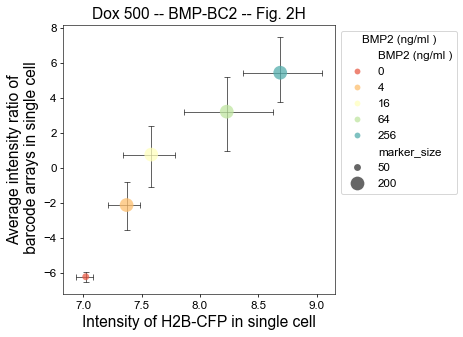

In [14]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

custom_palette = sns.color_palette("Spectral", 5)
plt.figure(figsize=(5, 5), dpi=70)

# Filter the stats DataFrame for the current CHIR level
temp_df = stats_df[(stats_df['Dox (ng/ml )'].isin([500,0])) & (stats_df['BMP2 (ng/ml )'].isin([0,4,16,64,256]))]

# Map 'BMP2 (ng/ml )' values to marker size
size_mapping = {0: 50, 4: 200, 16: 200, 64: 200, 256: 200}
temp_df['marker_size'] = temp_df['BMP2 (ng/ml )'].map(size_mapping)
# Create the scatter plot with error bars
sns.scatterplot(
    data=temp_df,
    x='lnCFP_median',
    y='int_diff_mean_median',
    hue='BMP2 (ng/ml )',
    palette=custom_palette,
    size='marker_size',  # set the marker size based on 'BMP2 (ng/ml )' values
    sizes=(50, 200),  # set the range of marker sizes
    zorder=2,
    alpha=0.75,
    edgecolor='none'  # marker edge color
)

# Add error bars
plt.errorbar(
        x=temp_df['lnCFP_median'], 
        y=temp_df['int_diff_mean_median'], 
        xerr=[(temp_df['lnCFP_75th']-temp_df['lnCFP_median']),(temp_df['lnCFP_median']-temp_df['lnCFP_25th'])],
        yerr=[(temp_df['int_diff_mean_75th']-temp_df['int_diff_mean_median']), (temp_df['int_diff_mean_median']-temp_df['int_diff_mean_25th'])],
        fmt='none',
        ecolor='black',
        capsize=3,
        linewidth = 0.625,
        capthick=0.625, 
        zorder=1,
        alpha=1
    )
    
# Set labels and title
plt.xlabel('Intensity of H2B-CFP in single cell')
plt.ylabel('Average intensity ratio of\n barcode arrays in single cell')
plt.title(f'Dox 500 -- BMP-BC2 -- Fig. 2H')

# Adjust the plot's aesthetics
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.625)

# Show legend
plt.legend(title='BMP2 (ng/ml )', loc='upper left', bbox_to_anchor=(1, 1), markerscale=1)
#plt.xlim([5.8, 10])
#plt.ylim([0.7, 1.45])
# Save the plot
#save_path = os.path.join(data_dir, f'230928_dBMPRsg17_median_interquartile_int_diff&CFP_Dox_500.svg')
#plt.savefig(save_path, dpi=300, format='svg', transparent=True)

# Show the plot
plt.show()

# Fig 2K

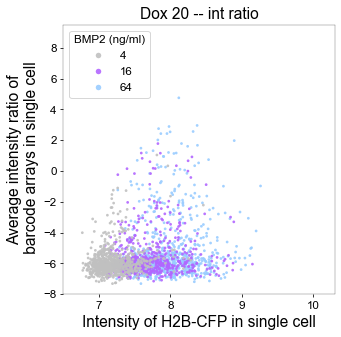

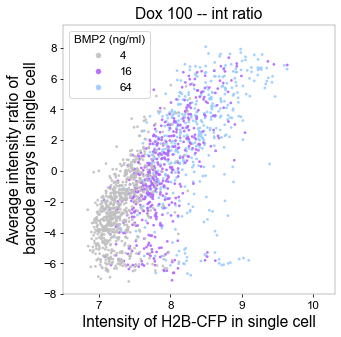

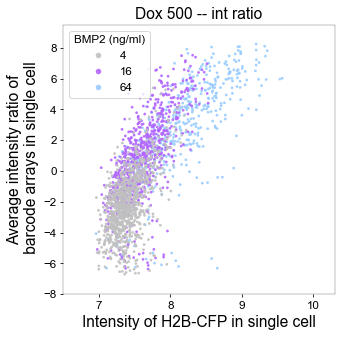

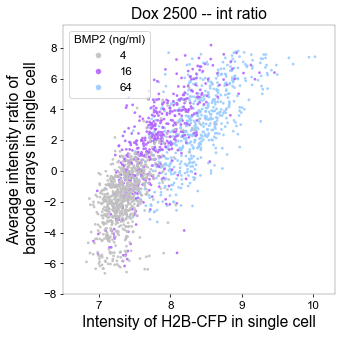

In [15]:
import os

dox_levels = [20, 100, 500, 2500]
color_palette = sns.color_palette(['#C0C0C0', '#B266FF', '#99CCFF']) 
#custom_palette = sns.color_palette("cubehelix", 4)

hue_order = [4, 16, 64]  # Define the desired order for 'BMP2 (ng/ml)'

for dox in dox_levels:
    plt.figure(figsize=(5, 5), dpi=70)
    temp_df = sc_df.loc[(sc_df['Dox (ng/ml )'] == dox) & (sc_df['cell_line'] >=0) & (sc_df['barcode_number sum'] > 2)].copy()
    sns.scatterplot(
        data=temp_df[temp_df['BMP2 (ng/ml )'].isin(hue_order)], 
        x='lnCFP', 
        y='int_diff mean', 
        hue='BMP2 (ng/ml )', 
        hue_order=hue_order,  # Specify the order of hues
        edgecolor='none',
        alpha=0.9,
        palette=color_palette, 
        s=8)
    
    plt.xlabel('Intensity of H2B-CFP in single cell')
    plt.ylabel('Average intensity ratio of\n barcode arrays in single cell')
    plt.xlim([6.5, 10.3])
    plt.ylim([-8, 9.5])
    plt.title(f'Dox {dox} -- int ratio')
    plt.legend(title='BMP2 (ng/ml)', bbox_to_anchor=(0, 1), loc='upper left', markerscale=2)
    plt.gca().spines['bottom'].set_linewidth(0.25)
    plt.gca().spines['left'].set_linewidth(0.25)
    plt.gca().spines['top'].set_linewidth(0.25)
    plt.gca().spines['right'].set_linewidth(0.25)
    
    #save_path = os.path.join(data_dir, f'230928_dBMPRsg17_BMP_dosage_int_diff&CFP_Dox_{dox}.svg')
    #plt.savefig(save_path, dpi=300, format='svg', transparent=True)
    plt.show()


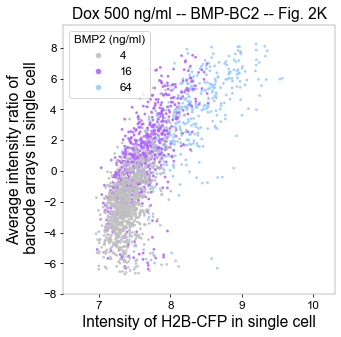

In [16]:
import os

color_palette = sns.color_palette(['#C0C0C0', '#B266FF', '#99CCFF']) 
#custom_palette = sns.color_palette("cubehelix", 4)

hue_order = [4, 16, 64]  # Define the desired order for 'BMP2 (ng/ml)'

plt.figure(figsize=(5, 5), dpi=70)
temp_df = sc_df.loc[(sc_df['Dox (ng/ml )'] == 500) & (sc_df['cell_line'] >=0) & (sc_df['barcode_number sum'] > 2)].copy()
sns.scatterplot(
    data=temp_df[temp_df['BMP2 (ng/ml )'].isin(hue_order)], 
    x='lnCFP', 
    y='int_diff mean', 
    hue='BMP2 (ng/ml )', 
    hue_order=hue_order,  # Specify the order of hues
    edgecolor='none',
    alpha=0.9,
    palette=color_palette, 
    s=8)

plt.xlabel('Intensity of H2B-CFP in single cell')
plt.ylabel('Average intensity ratio of\n barcode arrays in single cell')
plt.xlim([6.5, 10.3])
plt.ylim([-8, 9.5])
plt.title(f'Dox 500 ng/ml -- BMP-BC2 -- Fig. 2K')
plt.legend(title='BMP2 (ng/ml)', bbox_to_anchor=(0, 1), loc='upper left', markerscale=2)
plt.gca().spines['bottom'].set_linewidth(0.25)
plt.gca().spines['left'].set_linewidth(0.25)
plt.gca().spines['top'].set_linewidth(0.25)
plt.gca().spines['right'].set_linewidth(0.25)

#save_path = os.path.join(data_dir, f'230928_dBMPRsg17_BMP_dosage_int_diff&CFP_Dox_{dox}.svg')
#plt.savefig(save_path, dpi=300, format='svg', transparent=True)
plt.show()


In [17]:
# Define the BMP2_category

bmp_mapping = {
    0: 0,
    4: 1,
    16: 2,
    64: 3,
    256: 4,
    1024: 5
}

# Map the BMP levels to category labels
sc_df['BMP2_category'] = sc_df['BMP2 (ng/ml )'].map(bmp_mapping)

sc_df = sc_df.loc[sc_df['BMP2 (ng/ml )'] != 1024]
sc_df

,cell_line,position,cell_label,Dox (ng/ml ),BMP2 (ng/ml ),CFP_intensity,lnCFP,int_ratio mean,int_ratio std,int_ratio CV,int_diff mean,int_diff std,int_diff CV,mout avg mean,mout avg std,mout avg CV,barcode_number sum,BMP2_category
0,0,1,1,0,0,1020.498223,6.928046,0.625475,0.012181,1.590069,-6.568715,0.156380,-1.943822,0.359087,0.135968,30.916603,3,0
1,0,1,2,0,0,1062.261955,6.968156,0.623317,0.023855,3.423087,-6.764787,0.562720,-7.440180,0.295155,0.143673,43.538048,5,0
2,0,1,3,0,0,1093.059587,6.996736,0.616064,NaN,0.000000,-7.043901,NaN,-0.000000,0.271296,NaN,0.000000,1,0
3,0,1,4,0,0,1042.568262,6.949442,0.627106,0.024329,3.470008,-6.585881,0.316601,-4.299748,0.342741,0.090283,23.560460,5,0
4,0,1,5,0,0,1145.337976,7.043455,0.627530,0.076757,11.843176,-6.258003,1.048450,-16.221741,0.419530,0.129023,29.777555,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17430,20,9,69,20,4,962.053082,6.869070,0.622532,0.065193,10.061436,-6.550015,1.114520,-16.348002,0.382180,0.131907,33.160422,13,1
17431,20,9,70,20,4,1839.106764,7.517035,0.635130,0.063542,9.491232,-6.471267,1.228574,-18.010810,0.350386,0.113246,30.661824,10,1
17432,20,9,71,20,4,994.761629,6.902503,0.628758,0.021929,3.183803,-6.848468,0.485988,-6.478011,0.276732,0.078895,26.025479,6,1
17433,20,9,72,20,4,1386.660573,7.234654,0.607548,0.009337,1.402952,-6.516328,0.355499,-4.980184,0.464121,0.107343,21.113045,6,1


# Fig S3G

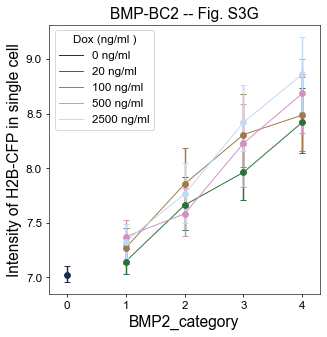

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a custom color palette with 5 colors
custom_palette = sns.color_palette("cubehelix", 5)

# Filter the DataFrames based on specified conditions
temp_df = sc_df[sc_df['Dox (ng/ml )'].isin([0])].copy()
temp_df_1 = sc_df[sc_df['Dox (ng/ml )'].isin([20])].copy()
temp_df_2 = sc_df[sc_df['Dox (ng/ml )'].isin([100])].copy()
temp_df_3 = sc_df[sc_df['Dox (ng/ml )'].isin([500])].copy()
temp_df_4 = sc_df[sc_df['Dox (ng/ml )'].isin([2500])].copy()

plt.figure(figsize=(5, 5), dpi=70)

# Custom estimator function to calculate the median
def median_func(y):
    return np.median(y)

# Functions to calculate the 25th and 75th percentiles (IQR)
def iqr_lower(y):
    return np.percentile(y, 25)

def iqr_upper(y):
    return np.percentile(y, 75)

# Define a list of DataFrames and labels for plotting
data_frames = [(temp_df, '0 ng/ml'), 
                (temp_df_1, '20 ng/ml'), 
                (temp_df_2, '100 ng/ml'), 
                (temp_df_3, '500 ng/ml'),
                (temp_df_4, '2500 ng/ml')]

# Plot each DataFrame with median and IQR error bars
for i, (df, label) in enumerate(data_frames):
    # Plot median points with error bars representing IQR
    sns.lineplot(x='BMP2_category', 
                 y='lnCFP', 
                 data=df, 
                 color=custom_palette[i],
                 estimator=median_func,
                 #errorbar=('ci', 95),
                 errorbar= None,
                 linewidth=1,
                 markersize=6,
                 #zorder=3,
                 label=label)

    # Calculate medians and IQR for the current DataFrame
    grouped = df.groupby('BMP2_category')['lnCFP']
    medians = grouped.median()
    iqr_lowers = grouped.quantile(0.25)
    iqr_uppers = grouped.quantile(0.75)

    plt.errorbar(medians.index, medians, yerr=[medians - iqr_lowers, iqr_uppers - medians],
                 fmt='o', color=custom_palette[i], capsize=3, capthick=1, ecolor=custom_palette[i])
#plt.xscale('log', base=2)
plt.xlim([-0.3, 4.3])
plt.title('Median and IQR of int_ratio')
plt.ylabel('Intensity of H2B-CFP in single cell')
plt.xlabel('BMP2_category')
plt.title('BMP-BC2 -- Fig. S3G')
plt.legend(title='Dox (ng/ml )', bbox_to_anchor=(0, 1), loc='upper left')
#plt.gca().margins(x=0.08)
plt.gca().spines['bottom'].set_linewidth(0.625)
plt.gca().spines['left'].set_linewidth(0.625)
plt.gca().spines['right'].set_linewidth(0.625)
plt.gca().spines['top'].set_linewidth(0.625)
#save_path = os.path.join(data_dir, f'230928_dBMPRsg17_BMP_dosage_lnCFP_median&IQR.svg')
#plt.savefig(save_path, dpi=300, format='svg', transparent=True)
plt.show()

# Fig S3H

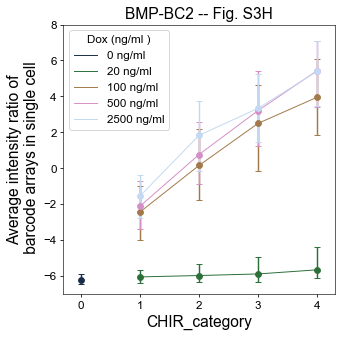

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a custom color palette with 5 colors
custom_palette = sns.color_palette("cubehelix", 5)

# Filter the DataFrames based on specified conditions
temp_df = sc_df[sc_df['Dox (ng/ml )'].isin([0])].copy()
temp_df_1 = sc_df[sc_df['Dox (ng/ml )'].isin([20])].copy()
temp_df_2 = sc_df[sc_df['Dox (ng/ml )'].isin([100])].copy()
temp_df_3 = sc_df[sc_df['Dox (ng/ml )'].isin([500])].copy()
temp_df_4 = sc_df[sc_df['Dox (ng/ml )'].isin([2500])].copy()

plt.figure(figsize=(5, 5), dpi=70)

# Custom estimator function to calculate the median
def median_func(y):
    return np.median(y)

# Functions to calculate the 25th and 75th percentiles (IQR)
def iqr_lower(y):
    return np.percentile(y, 25)

def iqr_upper(y):
    return np.percentile(y, 75)

# Define a list of DataFrames and labels for plotting
data_frames = [(temp_df, '0 ng/ml'), 
                (temp_df_1, '20 ng/ml'), 
                (temp_df_2, '100 ng/ml'), 
                (temp_df_3, '500 ng/ml'),
                (temp_df_4, '2500 ng/ml')]

# Plot each DataFrame with median and IQR error bars
for i, (df, label) in enumerate(data_frames):
    # Plot median points with error bars representing IQR
    sns.lineplot(x='BMP2_category', 
                 y='int_diff mean', 
                 data=df, 
                 color=custom_palette[i],
                 estimator=median_func,
                 #errorbar=('ci', 95),
                 errorbar= None,
                 linewidth=1,
                 markersize=6,
                 #zorder=3,
                 label=label)

    # Calculate medians and IQR for the current DataFrame
    grouped = df.groupby('BMP2_category')['int_diff mean']
    medians = grouped.median()
    iqr_lowers = grouped.quantile(0.25)
    iqr_uppers = grouped.quantile(0.75)

    plt.errorbar(medians.index, medians, yerr=[medians - iqr_lowers, iqr_uppers - medians],
                 fmt='o', color=custom_palette[i], capsize=3, capthick=1, ecolor=custom_palette[i])
#plt.xscale('log', base=2)
plt.ylim([-7, 8])
plt.xlim([-0.3, 4.3])
plt.title('Median and IQR of int_ratio')
plt.ylabel('Average intensity ratio of\n barcode arrays in single cell')
plt.xlabel('CHIR_category')
plt.title('BMP-BC2 -- Fig. S3H')
plt.legend(title='Dox (ng/ml )', bbox_to_anchor=(0, 1), loc='upper left')
#plt.gca().margins(x=0.08)
plt.gca().spines['bottom'].set_linewidth(0.625)
plt.gca().spines['left'].set_linewidth(0.625)
plt.gca().spines['right'].set_linewidth(0.625)
plt.gca().spines['top'].set_linewidth(0.625)
#save_path = os.path.join(data_dir, f'230928_dBMPRsg17_BMP_dosage_int_diff_median&IQR.svg')
#plt.savefig(save_path, dpi=300, format='svg', transparent=True)
plt.show()

# Fig S3I

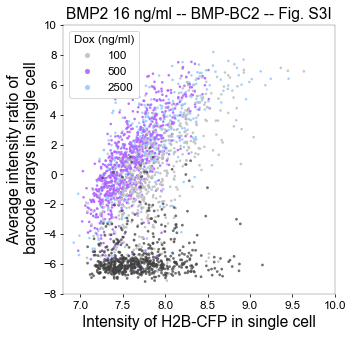

In [24]:
import os

color_palette = sns.color_palette(['#C0C0C0', '#B266FF', '#99CCFF']) 
#custom_palette = sns.color_palette("cubehelix", 5)
#color_palette = [custom_palette[2],custom_palette[3],custom_palette[4]]

plt.figure(figsize=(5, 5), dpi=70)

temp_df = sc_df.loc[(sc_df['BMP2 (ng/ml )'] == 16) & (sc_df['barcode_number sum'] > 2)].copy()

sns.scatterplot(
    data=temp_df[temp_df['Dox (ng/ml )'].isin([100, 500, 2500])], 
    x='lnCFP', 
    y='int_diff mean', 
    hue='Dox (ng/ml )', 
    edgecolor='none',
    alpha=0.9,
    zorder=1,
    palette=color_palette,
    s=7)
sns.scatterplot(
    data=temp_df[temp_df['Dox (ng/ml )'].isin([20])], 
    x='lnCFP', 
    y='int_diff mean', 
    color='#404040',
    edgecolor='none',
    alpha=0.75,
    zorder=2,
    s=8)

plt.xlabel('Intensity of H2B-CFP in single cell')
plt.ylabel('Average intensity ratio of\n barcode arrays in single cell')
plt.title(f'BMP2 16 ng/ml -- BMP-BC2 -- Fig. S3I')
plt.xlim([6.8, 10])
plt.ylim([-8, 10])
plt.legend(title='Dox (ng/ml)', bbox_to_anchor=(0, 1), loc='upper left', markerscale=2)
plt.gca().spines['bottom'].set_linewidth(0.25)
plt.gca().spines['left'].set_linewidth(0.25)
plt.gca().spines['top'].set_linewidth(0.25)
plt.gca().spines['right'].set_linewidth(0.25)

#save_path = os.path.join(data_dir, f'230928_dBMPRsg17_Dox_dosage_int_diff&CFP_BMP16.svg')
#plt.savefig(save_path, dpi=300, format='svg', transparent=True)
plt.show()